# Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

“Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .”

In [2]:
data = pd.read_csv('data/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Scale data

The next step is to rescale our data. Datasets can contain random attributes with different units of measurement. To perform a reasonable covariance analysis we need to normalize this data, putting all attributes in the same unit of measurement will improve the maximization of the variance for each component that our PCA needs to perform its matrix operations in the best way. ML algorithms work better with data in this shape.

In [3]:
# the target column is removed to perform scaling
data_pca = data[[x for x in data.columns if x != 'target_class']]

In [4]:
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(data_pca)

data_rescaled

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

## PCA

In [5]:
pca = PCA().fit(data_rescaled)

In [6]:
# principal axes in feature space, representing the directions of maximum variance in the data
# components sorted by variance ratio (eigenvalue / sum(eigenvalues)) -> How large the variance is in the new directions
pca.explained_variance_ratio_

array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

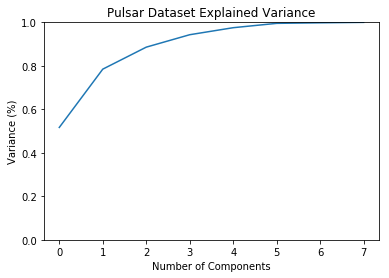

In [7]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.ylim([0,1])
plt.title('Pulsar Dataset Explained Variance')
plt.show()

This plot tells us that selecting 5 components we can preserve something around 98.8% or 99% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.
With this information in our hands, we can implement the PCA for 5 best components.

## Optimum Analysis

In [8]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(data_rescaled)

In [9]:
pd.DataFrame(dataset).head()

,0,1,2,3,4
0,-1.278849,-1.273133,0.016213,0.662102,0.577362
1,-1.020553,-0.201162,0.670478,1.605779,-0.390326
2,0.188289,0.432114,-0.979766,-0.519232,-0.305346
3,-1.015466,-1.469881,-0.018832,0.938386,0.495189
4,-0.822626,2.123651,0.407953,-0.380922,-0.654083


The previous result show the original dataset projected into the 5 principal directions. It has not a straightforward meaning in terms of correspondence between columns in the original dataset because IT IS PROJECTION, NOT FEATURE SELECTION

## No scaled data

In [10]:
pca = PCA().fit(data_pca)

In [11]:
pca.explained_variance_ratio_

array([8.71053041e-01, 7.81934383e-02, 4.11562290e-02, 6.15967691e-03,
       2.43717952e-03, 9.58578490e-04, 3.90570992e-05, 2.79968662e-06])

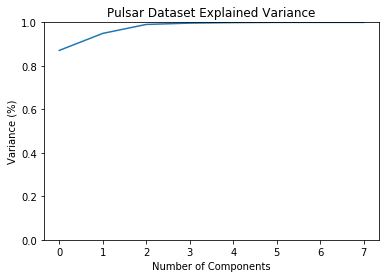

In [12]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.ylim([0,1])
plt.title('Pulsar Dataset Explained Variance')
plt.show()